In [1]:
import pandas as pd
import numpy as np
import nltk
import gensim
import gensim.downloader as gensim_api

import re

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\karth\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
#loading the train and the test data
train = pd.read_csv("C:/Users/karth/Desktop/Dissertation/Data/AG_news_train.csv")
test = pd.read_csv("C:/Users/karth/Desktop/Dissertation/Data/AG_news_test.csv")
frames = [train,test]
data = pd.concat(frames)
data

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [3]:
data['Class Index'] = data['Class Index'].astype('str')
classes = {"1" : "World",
                     "2" : "Sports",
                     "3" : "Business",
                     "4" : "Sci&Tech"}

data['Class'] = data['Class Index'].map(classes)
data

,Class Index,Title,Description,Class
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business
...,...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...,World
7596,2,Void is filled with Clement,With the supply of attractive pitching options...,Sports
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,Sports
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,Business


In [4]:
def text_preprocessing(text, flag_stemm=False, flag_lemma=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    
    #remove numbers from text
    text = re.sub("\d+", "", text)
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flag_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flag_lemma == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    
    return text

lst_stopwords = nltk.corpus.stopwords.words("english")

In [5]:
##applying the text preprocessing function created to the entire dataset
data["cleaned_text"] = data["Description"].apply(lambda x: text_preprocessing(x, flag_stemm=False, flag_lemma=True, lst_stopwords=lst_stopwords))
data.head()

,Class Index,Title,Description,Class,cleaned_text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business,reuters shortsellers wall street dwindlingband...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business,reuters private investment firm carlyle groupw...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business,reuters soaring crude price plus worriesabout ...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business,reuters authority halted oil exportflows main ...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business,afp tearaway world oil price toppling record s...


In [6]:
data_sample = data.groupby('Class').apply(lambda x: x.sample(n=5000)).reset_index(drop = True)
data_sample['Class'].value_counts()

World       5000
Sci&Tech    5000
Business    5000
Sports      5000
Name: Class, dtype: int64

In [7]:
# Importing libraries
import os
import sys
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.layers import MaxPool1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import History 
history = History()
from tensorflow.keras.optimizers import Adam

In [8]:
# make the max word length to be constant
MAX_WORDS = 10000
MAX_SEQUENCE_LENGTH = 1000
# the percentage of train test split to be applied
VALIDATION_SPLIT = 0.20
# the dimension of vectors to be used
EMBEDDING_DIM = 300
# dropout probability
drop = 0.5
batch_size = 100
epochs = 10

In [9]:
texts = data_sample['cleaned_text']
labels = data_sample.iloc[:, 0].astype(str)
tokenizer  = Tokenizer(num_words = MAX_WORDS)
tokenizer.fit_on_texts(texts)
sequences =  tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("unique words : {}".format(len(word_index)))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
print(labels)

unique words : 32397
Shape of data tensor: (20000, 1000)
Shape of label tensor: (20000, 5)
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [10]:
# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [11]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors
PATH = 'C:/Users/karth/Desktop/Dissertation/Code'
word_vectors = KeyedVectors.load_word2vec_format(PATH+'/GoogleNews-vectors-negative300.bin', binary=True)

EMBEDDING_DIM=300
        
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
    except KeyError:
        embedding_vector = 0
        
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [12]:
from keras.layers import Embedding
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5)
])

In [15]:
checkpoint = ModelCheckpoint('weights_RNN_sentece.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 300)         9719400   
                                                                 
 bidirectional_2 (Bidirectio  (None, 1000, 128)        186880    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                

In [16]:
print("RNN model Traning with Word2Vec embedding...")
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_val, y_val),callbacks=[checkpoint])

RNN model Traning with Word2Vec embedding...
Epoch 1/10
500/500 [==============================] - 2133s 4s/step - loss: 0.9328 - accuracy: 0.6592 - val_loss: 0.5011 - val_accuracy: 0.8350
Epoch 2/10
500/500 [==============================] - 2129s 4s/step - loss: 0.5075 - accuracy: 0.8441 - val_loss: 0.4130 - val_accuracy: 0.8587
Epoch 3/10
500/500 [==============================] - 2221s 4s/step - loss: 0.4449 - accuracy: 0.8611 - val_loss: 0.4101 - val_accuracy: 0.8590
Epoch 4/10
500/500 [==============================] - 2280s 5s/step - loss: 0.4149 - accuracy: 0.8694 - val_loss: 0.3782 - val_accuracy: 0.8690
Epoch 5/10
500/500 [==============================] - 2224s 4s/step - loss: 0.3912 - accuracy: 0.8780 - val_loss: 0.3719 - val_accuracy: 0.8700
Epoch 6/10
500/500 [==============================] - 2391s 5s/step - loss: 0.3746 - accuracy: 0.8834 - val_loss: 0.3723 - val_accuracy: 0.8700
Epoch 7/10
500/500 [==============================] - 2550s 5s/step - loss: 0.3592 - accura

In [48]:
test_loss, test_acc = model.evaluate(x_val, y_val)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

3/3 [==============================] - 9s 3s/step - loss: 0.5873 - accuracy: 0.7750
Test Loss: 0.5872714519500732
Test Accuracy: 0.7749999761581421


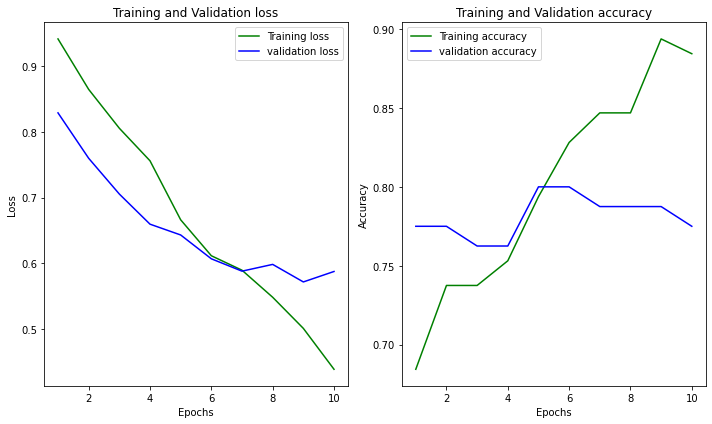

In [51]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = []
for x in range(1,11):
    epochs.append(x)
    
fig, (axes1, axes2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes1.plot(epochs, loss_train, 'g', label='Training loss')
axes1.plot(epochs, loss_val, 'b', label='validation loss')
axes1.title.set_text('Training and Validation loss')
axes1.set_xlabel('Epochs')
axes1.set_ylabel('Loss')
axes1.legend()

axes2.plot(epochs, acc_train, 'g', label='Training accuracy')
axes2.plot(epochs, acc_val, 'b', label='validation accuracy')
axes2.title.set_text('Training and Validation accuracy')
axes2.set_xlabel('Epochs')
axes2.set_ylabel('Accuracy')
axes2.legend()
fig.tight_layout()

              precision    recall  f1-score   support

    Business       0.91      0.85      0.88      1013
     Sci&Tec       0.93      0.93      0.93       985
      Sports       0.84      0.82      0.83      1001
       World       0.80      0.88      0.84      1001

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



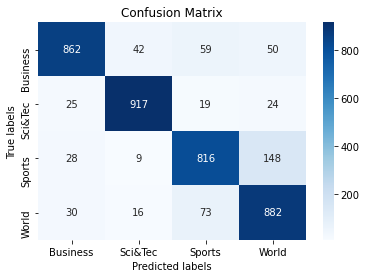

In [17]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt   
y_pred_ohe = model.predict(x_val)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
y_labels = np.argmax(y_val, axis=1)
target_names = ["Business","Sci&Tec","Sports","World"]
confusion_matrix = metrics.confusion_matrix(y_true=y_labels, y_pred=y_pred_labels)  # shape=(12, 12)

ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt="d",cmap='Blues',ax=ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

print(classification_report(y_labels, y_pred_labels, target_names=target_names))

In [18]:
# make the max word length to be constant
MAX_WORDS = 10000
MAX_SEQUENCE_LENGTH = 1000
# the percentage of train test split to be applied
VALIDATION_SPLIT = 0.20
# the dimension of vectors to be used
EMBEDDING_DIM = 300
# dropout probability
drop = 0.5
batch_size = 100
epochs = 10

In [19]:
texts = data_sample['cleaned_text']
labels = data_sample.iloc[:, 0].astype(str)
tokenizer  = Tokenizer(num_words = MAX_WORDS)
tokenizer.fit_on_texts(texts)
sequences =  tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("unique words : {}".format(len(word_index)))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
print(labels)

unique words : 32397
Shape of data tensor: (20000, 1000)
Shape of label tensor: (20000, 5)
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [20]:
# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [21]:
GLOVE_DIR = 'C:/Users/karth/Desktop/Dissertation/Code/'
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [22]:
from keras.layers import Embedding
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [23]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5)
])

In [24]:
checkpoint = ModelCheckpoint('weights_RNN_sentece.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 300)         9719400   
                                                                 
 bidirectional_4 (Bidirectio  (None, 1000, 128)        186880    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                

In [25]:
print("RNN model Traning with GloVe embedding...")
hist = model1.fit(x_train, y_train, epochs=10,validation_data=(x_val, y_val),callbacks=[checkpoint])

RNN model Traning with GloVe embedding...
Epoch 1/10
500/500 [==============================] - 2879s 6s/step - loss: 0.8937 - accuracy: 0.6820 - val_loss: 0.4554 - val_accuracy: 0.8482
Epoch 2/10
500/500 [==============================] - 3026s 6s/step - loss: 0.4937 - accuracy: 0.8496 - val_loss: 0.4134 - val_accuracy: 0.8615
Epoch 3/10
500/500 [==============================] - 3142s 6s/step - loss: 0.4426 - accuracy: 0.8635 - val_loss: 0.3826 - val_accuracy: 0.8720
Epoch 4/10
500/500 [==============================] - 3219s 6s/step - loss: 0.4095 - accuracy: 0.8733 - val_loss: 0.3749 - val_accuracy: 0.8767
Epoch 5/10
500/500 [==============================] - 3201s 6s/step - loss: 0.3879 - accuracy: 0.8774 - val_loss: 0.3660 - val_accuracy: 0.8783
Epoch 6/10
500/500 [==============================] - 3312s 7s/step - loss: 0.3760 - accuracy: 0.8817 - val_loss: 0.3645 - val_accuracy: 0.8755
Epoch 7/10
500/500 [==============================] - 3374s 7s/step - loss: 0.3642 - accuracy:

In [26]:
test_loss, test_acc = model1.evaluate(x_val, y_val)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

125/125 [==============================] - 402s 3s/step - loss: 0.3566 - accuracy: 0.8813
Test Loss: 0.3566293716430664
Test Accuracy: 0.8812500238418579


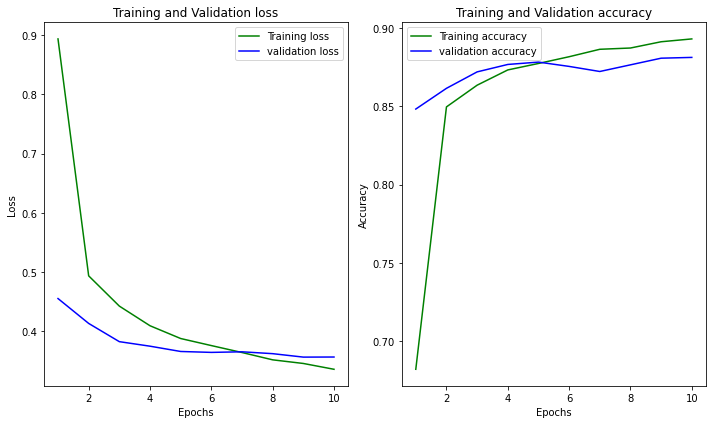

In [27]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']
epochs = []
for x in range(1,11):
    epochs.append(x)
    
fig, (axes1, axes2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes1.plot(epochs, loss_train, 'g', label='Training loss')
axes1.plot(epochs, loss_val, 'b', label='validation loss')
axes1.title.set_text('Training and Validation loss')
axes1.set_xlabel('Epochs')
axes1.set_ylabel('Loss')
axes1.legend()

axes2.plot(epochs, acc_train, 'g', label='Training accuracy')
axes2.plot(epochs, acc_val, 'b', label='validation accuracy')
axes2.title.set_text('Training and Validation accuracy')
axes2.set_xlabel('Epochs')
axes2.set_ylabel('Accuracy')
axes2.legend()
fig.tight_layout()

              precision    recall  f1-score   support

    Business       0.94      0.88      0.91      1015
     Sci&Tec       0.97      0.96      0.96       993
      Sports       0.87      0.84      0.86       988
       World       0.82      0.91      0.86      1004

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



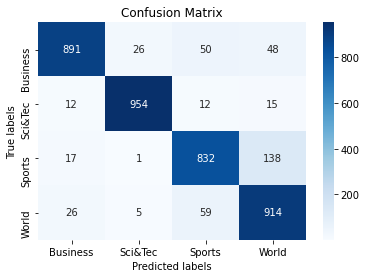

In [28]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt   
y_pred_ohe = model.predict(x_val)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
y_labels = np.argmax(y_val, axis=1)
target_names = ["Business","Sci&Tec","Sports","World"]
confusion_matrix = metrics.confusion_matrix(y_true=y_labels, y_pred=y_pred_labels)  # shape=(12, 12)

ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt="d",cmap='Blues',ax=ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

print(classification_report(y_labels, y_pred_labels, target_names=target_names))